# Machine Learning: Perceptron Algorithm

Submitted by Mary Franczine Tan

Applied Physics 157

AY 2022-2023 2nd Semester

In [34]:
# import packages

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from skimage.measure import regionprops, label, regionprops_table
from skimage.util import img_as_ubyte

In [13]:
# extract filenames 

apple_filenames = sorted(glob.glob('train/freshapples/*.png'))
banana_filenames = sorted(glob.glob('train/freshbanana/*.png'))

In [195]:
def processImage(img):
    """
        reads image and performs thresholding and masking
    """
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # convert image to grayscale
    gray[np.where(gray < 50)] = gray.max() # turn black background portions to white
    
    blur = cv2.GaussianBlur(gray, (5, 5), 0) # apply gaussian blur to image
    ret, th = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # segment using otsu's method
    
    th2 = cv2.bitwise_not(th) # invert threshold 
    thresh1d = cv2.erode(th2, np.ones((10,10), np.uint8)) # erode threshold
    thresh3d = cv2.merge((thresh1d, thresh1d, thresh1d)) # create 3-layer threshold for masking
    masked = cv2.bitwise_and(img, thresh) # mask image
    
    return masked, morphed

In [201]:
def getRegionProps(file):
    
    orig = img_as_ubyte(plt.imread(file)) # read image as uint8 type
    img, bnw = processImage(orig)
    plt.imshow(img)

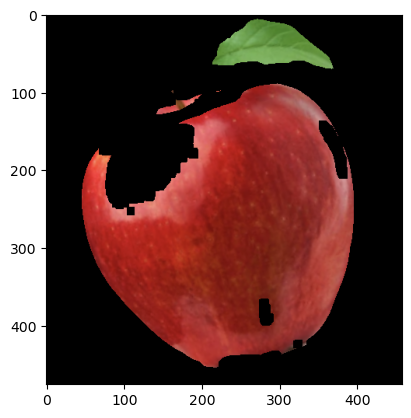

In [202]:
getRegionProps(apple_filenames[0])

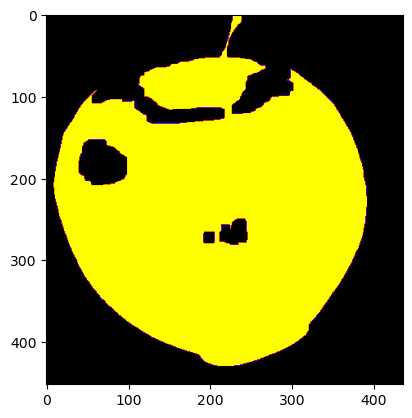

In [189]:
img, bnw = processImage(apple_filenames[1])
labeled = label(bnw)
plt.imshow(bnw, cmap = 'gnuplot')

In [190]:
regions = regionprops(labeled)

In [191]:
props = regionprops_table(labeled, properties = ('label', 'centroid', 'area',
                                                 'orientation', 'solidity'))

In [193]:
import pandas as pd
props_df = pd.DataFrame(props)
display(props_df.head())

,label,centroid-0,centroid-1,area,orientation,solidity
0,1,239.590478,207.614491,100942,1.329139,0.864489


In [184]:
for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + np.cos(orientation) * 0.5 * props.axis_minor_length
    y1 = y0 - np.sin(orientation) * 0.5 * props.axis_minor_length
    x2 = x0 - np.sin(orientation) * 0.5 * props.axis_major_length
    y2 = y0 - np.cos(orientation) * 0.5 * props.axis_major_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=1.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=1.5)
    ax.plot(x0, y0, '.g', markersize=5)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=1.5)

ax.set_title('Bounding Boxes and Axes of Blobs', size = 25)
ax.axis('off')
plt.show()
fig.savefig('reportpics/boxedblobs.png')

ValueError: too many values to unpack (expected 2)

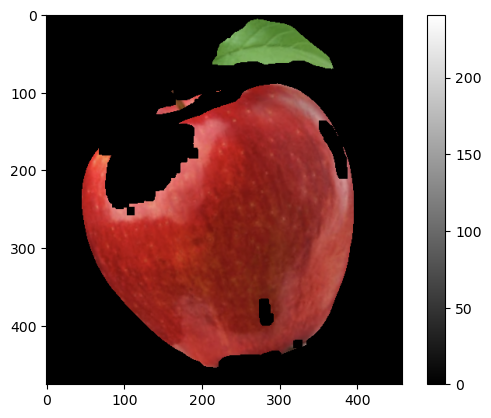

In [168]:
img = img_as_ubyte(plt.imread(apple_filenames[0])) # read image as uint8
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # convert image to grayscale

    
blur = cv2.GaussianBlur(gray, (5, 5), 0) # apply gaussian blur to image
ret, th = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # segment using otsu's method
    
th2 = cv2.bitwise_not(th) # invert threshold 
morphed = cv2.erode(th2, np.ones((10,10), np.uint8)) # erode threshold
thresh = cv2.merge((morphed, morphed, morphed)) # create 3-layer threshold for masking
masked = cv2.bitwise_and(img, thresh) # mask image

plt.imshow(masked, cmap = 'gray')
plt.colorbar()

In [14]:
apples = [plt.imread(file) for file in apple_filenames]
bananas = [plt.imread(file) for file in banana_filenames]

sources

- https://scikit-image.org/docs/stable/user_guide/data_types.html